<a href="https://colab.research.google.com/github/hugomilesi/E2E_customer_churn_analysis/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and model selection

In [2]:
#hide
%%writefile kaggle.json
{"username":"Your_username","key":"Your_api_key"}

Writing kaggle.json


In [3]:
#hide
!pip install -q -U kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=45d2f61c637a43ba21cbe2d848d0d1c1372aa316b074d8db823bb8985a142bc1
  Stored in directory: /root/.cache/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [4]:
# downloading the dataset
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 66.9MB/s]


In [5]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# Information About the dataset

- CustomerID - customer ID.

- Gender - Whether the customer is a male or a female.

- SeniorCitizen - whether the customer is a senior citizen or not (1,0)

- Partner - whether the customer has a partner ot not (Yes, No)

- Dependents - Whether the customer has dependents or not(Yes, No).

- Tenure -  Number of months the customer has stayed with the company.

- PhoneService - whether the customer has a phone service or not (Yes, No)

- MultipleLines  - Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service).

- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service).

- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service) 

- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

- Contract - The contract term of the customer (Month-to-month, One year, Two year)

- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

- PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- MonthlyCharges - The amount charged to the customer monthly

- TotalCharges - The total amount charged to the customer

- Churn - Whether the customer churned or not (Yes or No)

---


# Data Mining and Model Selection

In [6]:
# data analysis
%matplotlib inline
import pandas as pd, numpy as np, tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# data normalization and preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.combine import SMOTEENN

# cross validation
from sklearn.model_selection import GridSearchCV


# model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

# model saving
import pickle


import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 60
pd.options.display.max_rows = 60


In [7]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing

In [8]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# total charge is in string format and contain blank spaces. We need to convert to numeric and fill blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(r' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# checking for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- we got 11 rows containing null values for 'TotalCharges' column
- Since only 11 values are missing from a dataset of more than 7k rows, i will remove them.



In [10]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)
df['TotalCharges'].isna().sum()

0

- SeniorCitizen is a categorical data but is in 'int64' format, let's convert it to object

In [11]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

- Churn column contain values 'Yes' and 'No'.
- Since this dataset has a lot of categorical values containing "Yes" and "No", i will rename the values of the "Churn" column with the following: "**Yes**" to "**Churn_yes**" and "**No**" for "**Churn_no**". 

In [12]:
df['Churn'].replace({'Yes': 'Churn_yes', 'No' : 'Churn_no'}, inplace = True)
df['Churn'].value_counts()

Churn_no     5163
Churn_yes    1869
Name: Churn, dtype: int64

In [13]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032,2,No,5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# it will be useless in the analysis
del df['customerID']

In [15]:
# stores only categorical data
categorical = df.select_dtypes(include = ['object']).columns
categorical

# stores only quatitative data
quant = df.select_dtypes(include = ['float64', 'int64']).columns

print(f'This dataset contains {len(categorical)} categorical data and {len(quant)} quantitative data')
print(f'Categorical columns are: {list(categorical)} \n\nQuanticative columns are: {list(quant)} ')

This dataset contains 17 categorical data and 3 quantitative data
Categorical columns are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Quanticative columns are: ['tenure', 'MonthlyCharges', 'TotalCharges'] 


# Some Feature Engineering

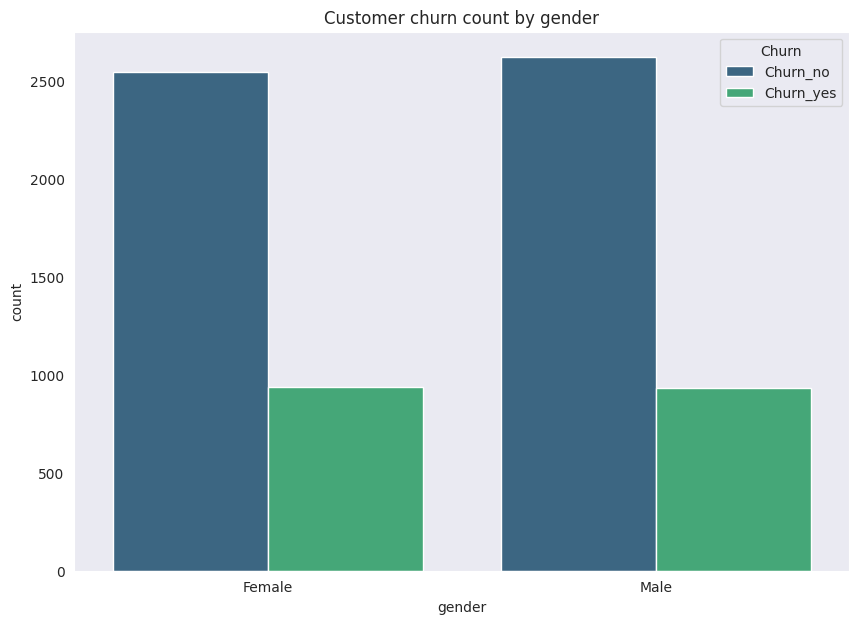

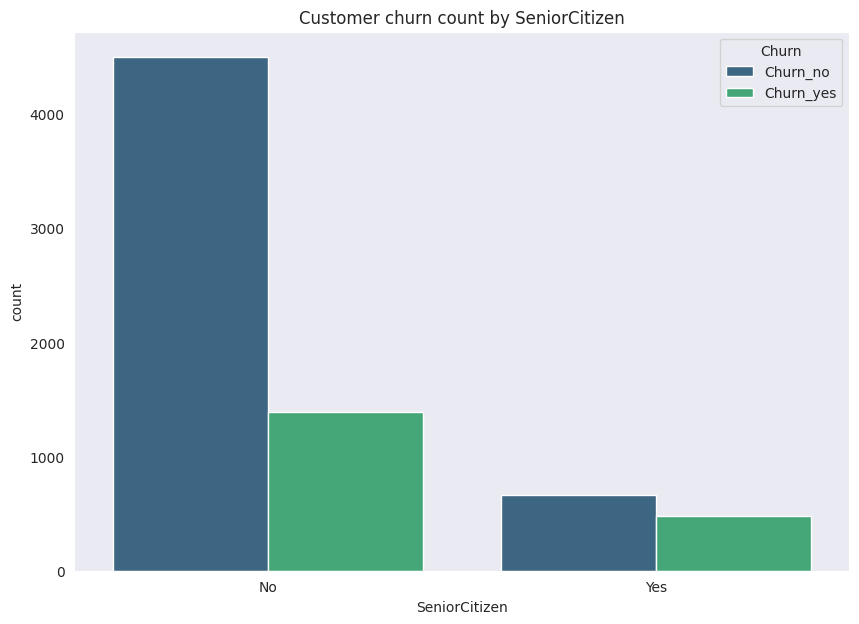

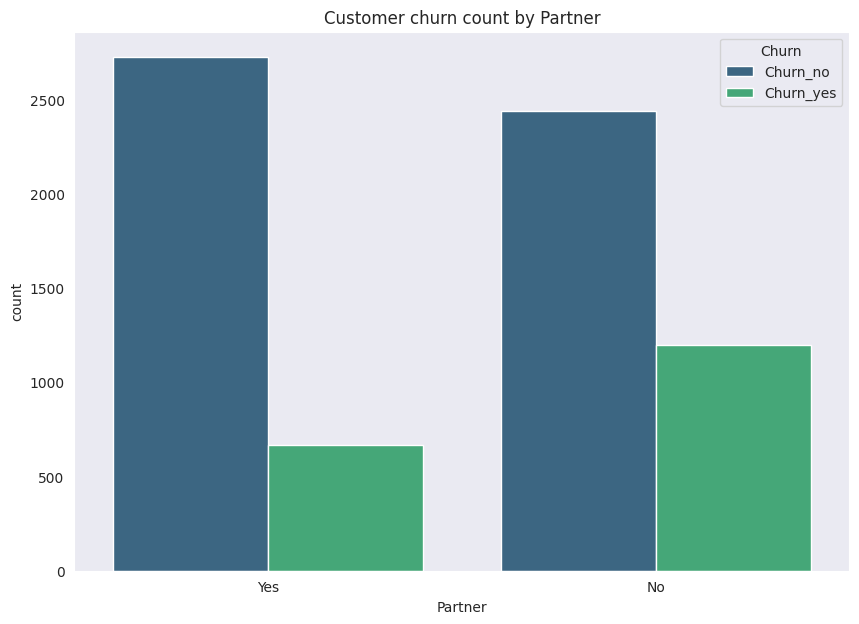

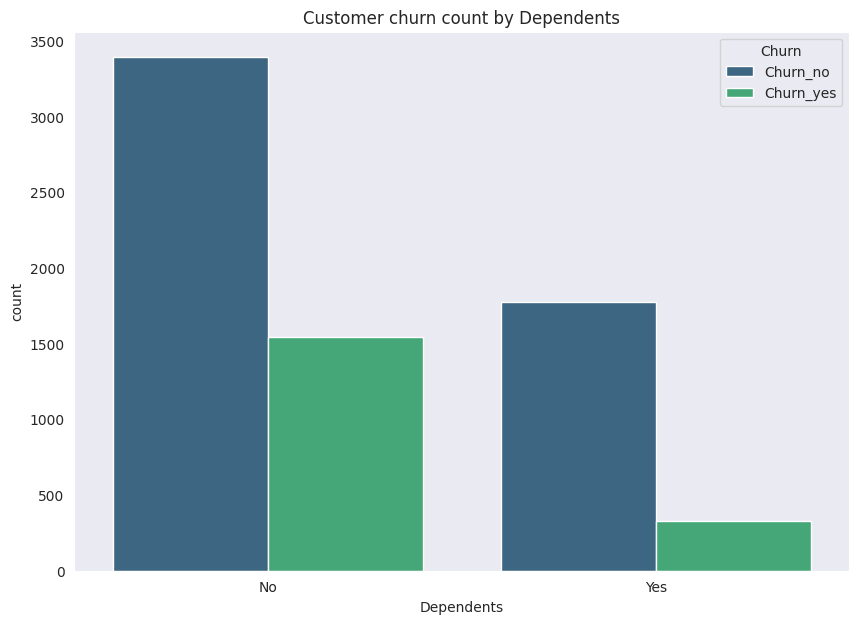

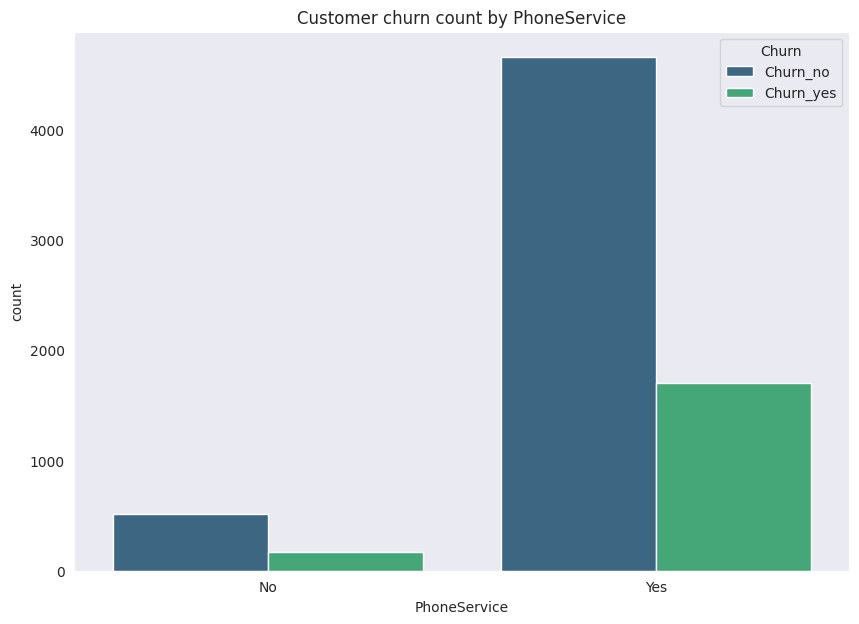

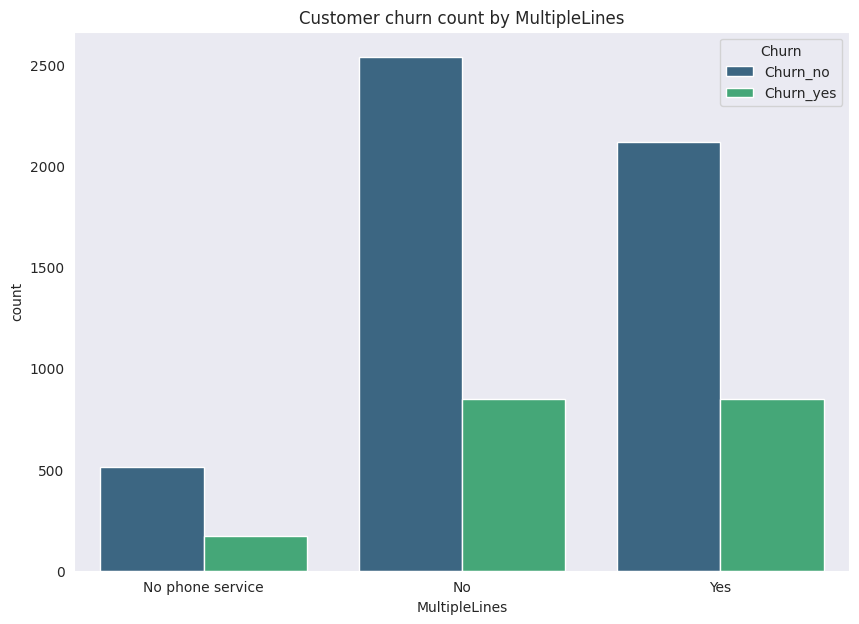

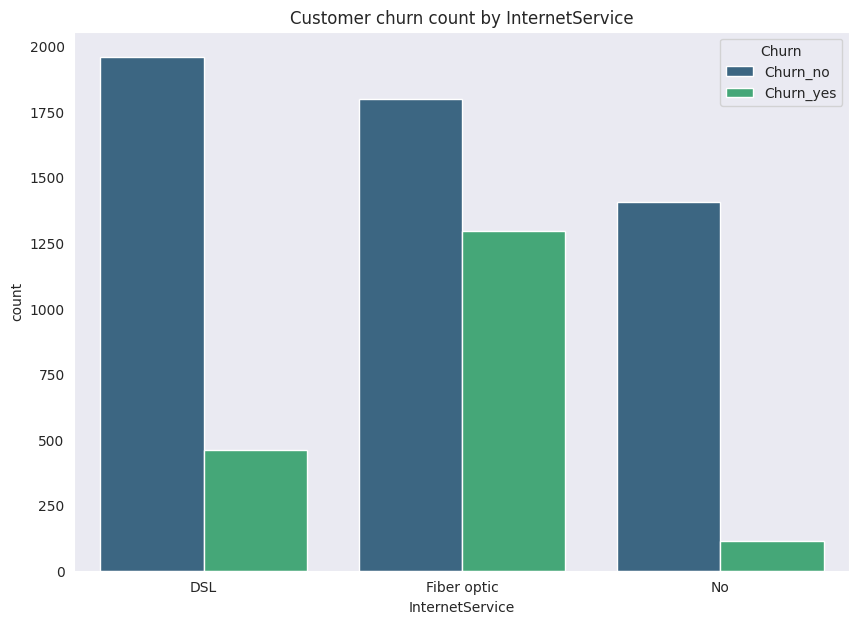

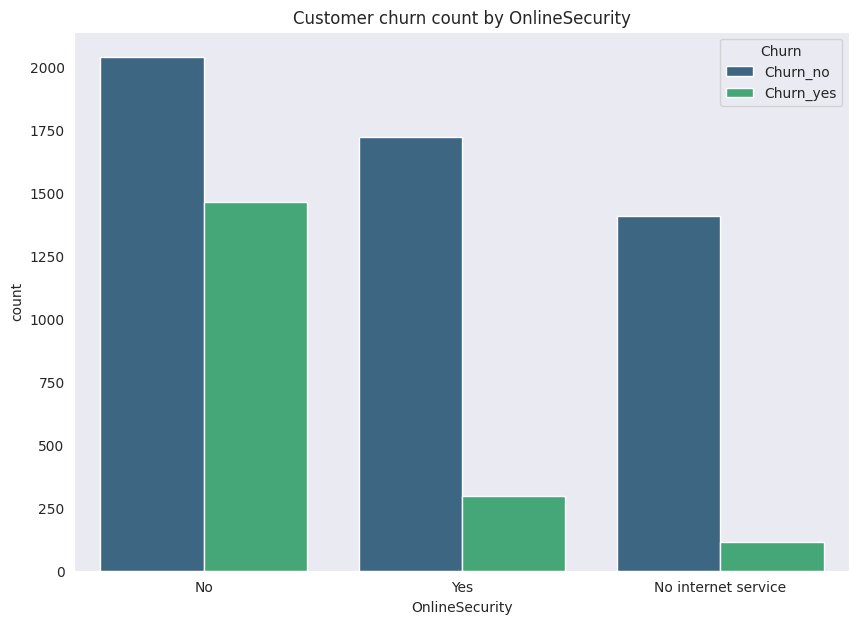

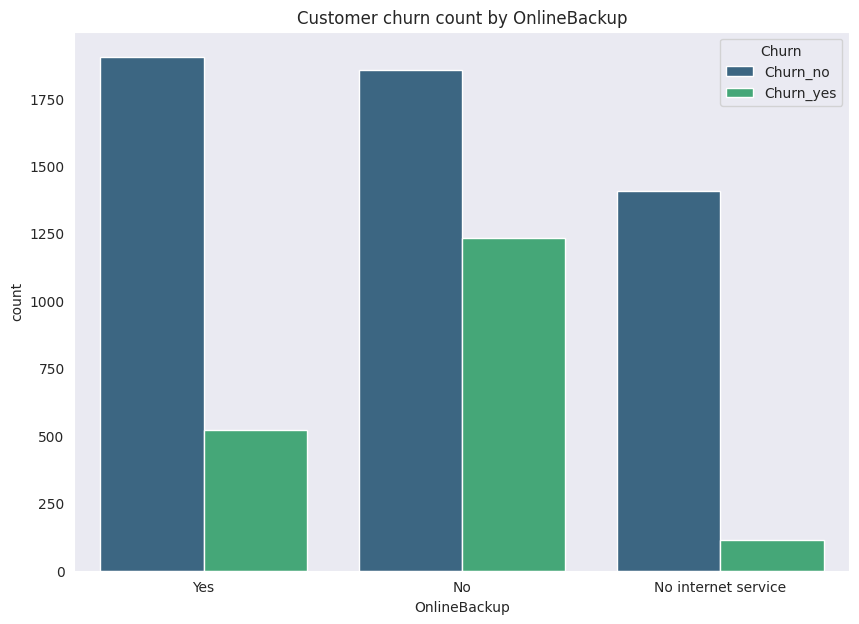

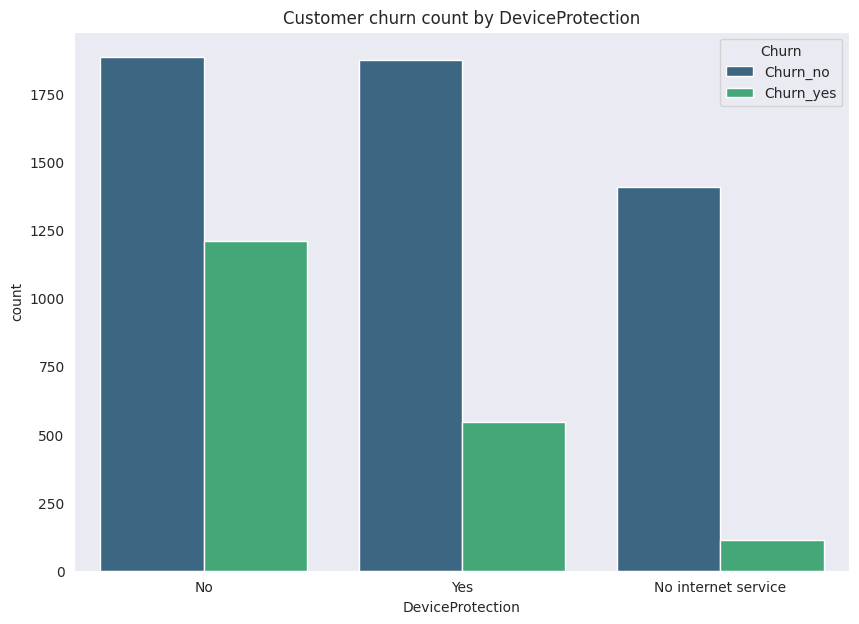

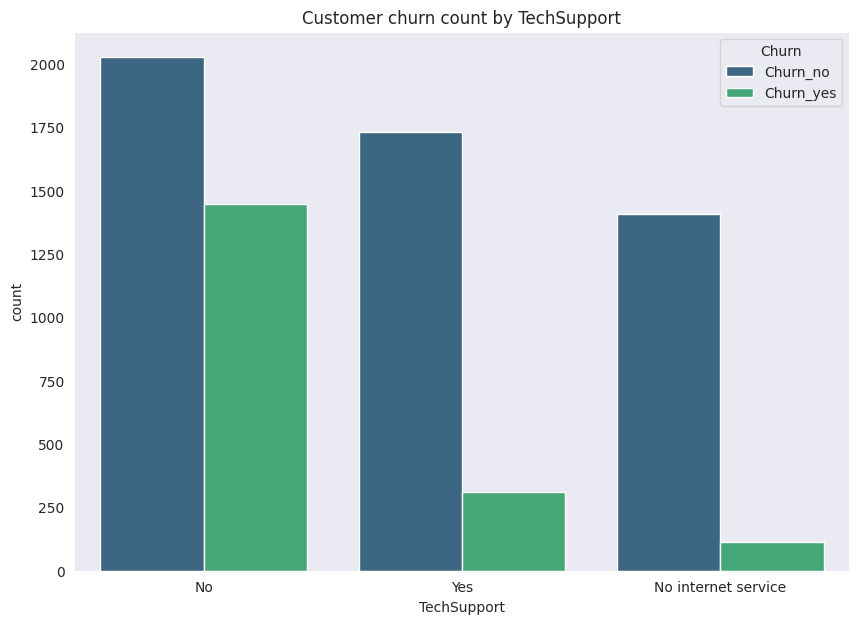

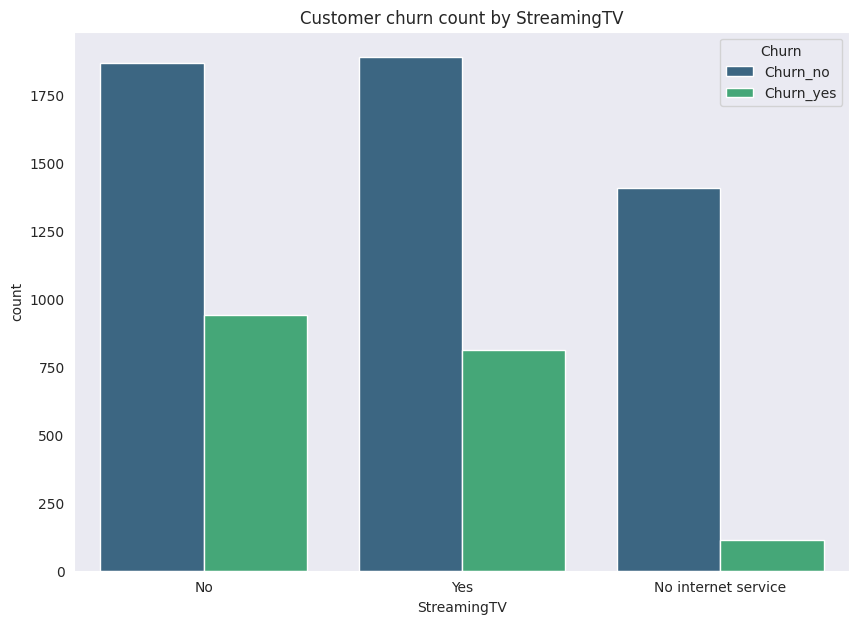

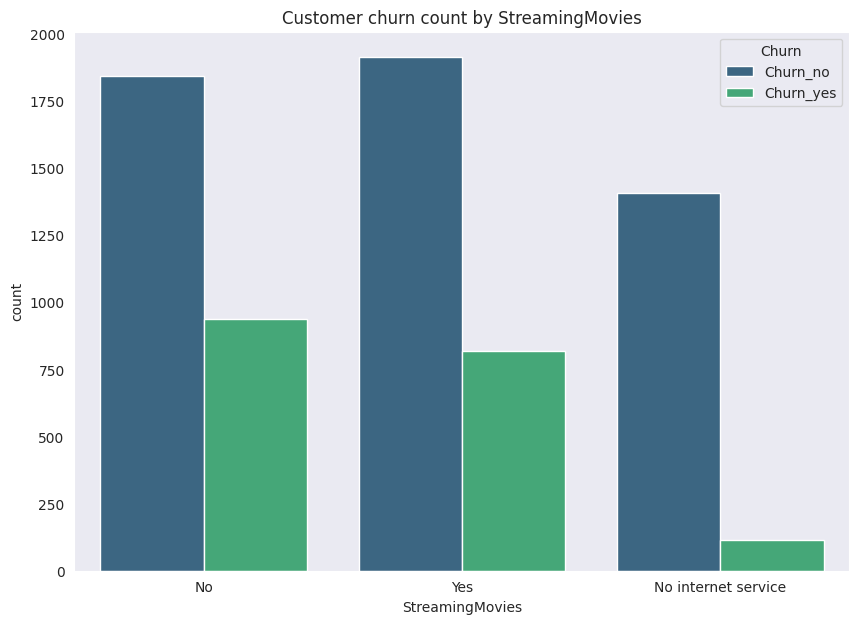

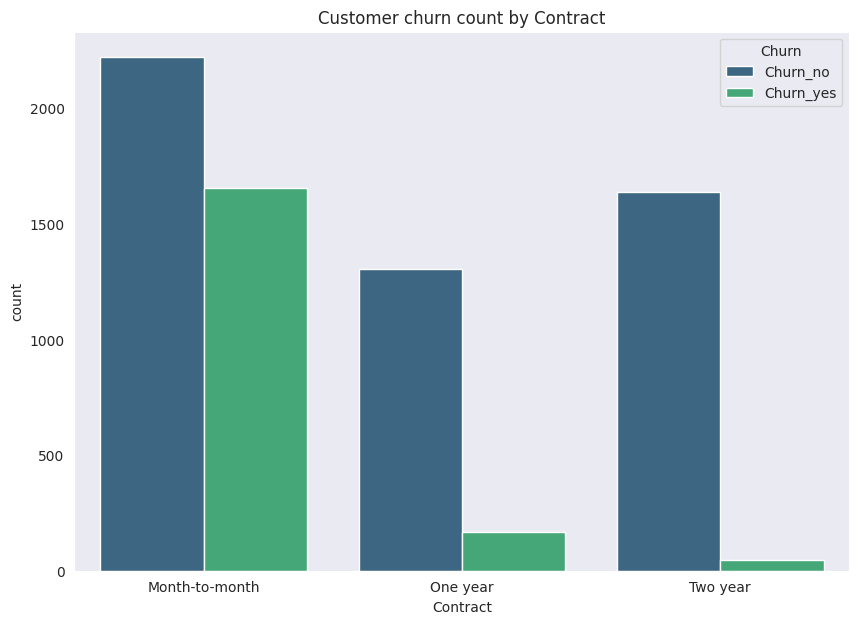

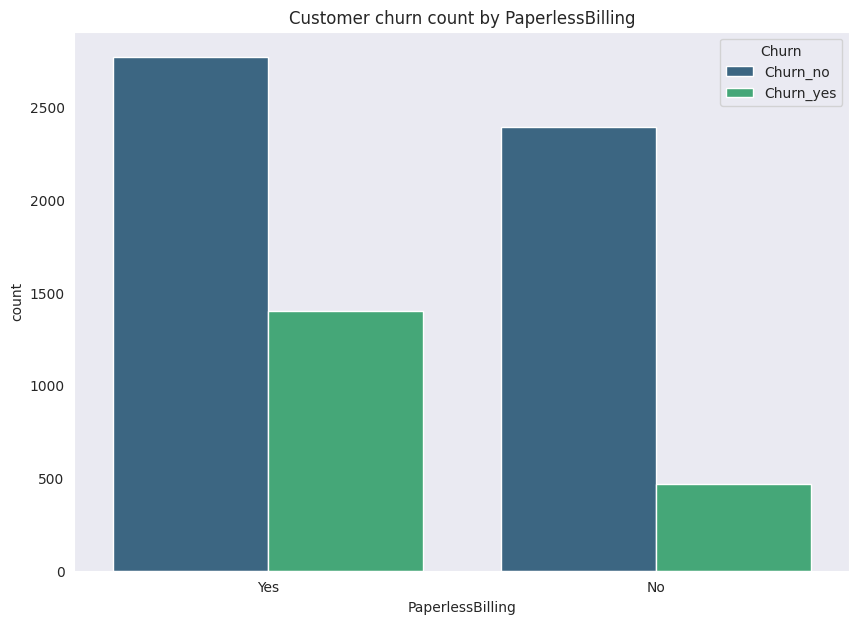

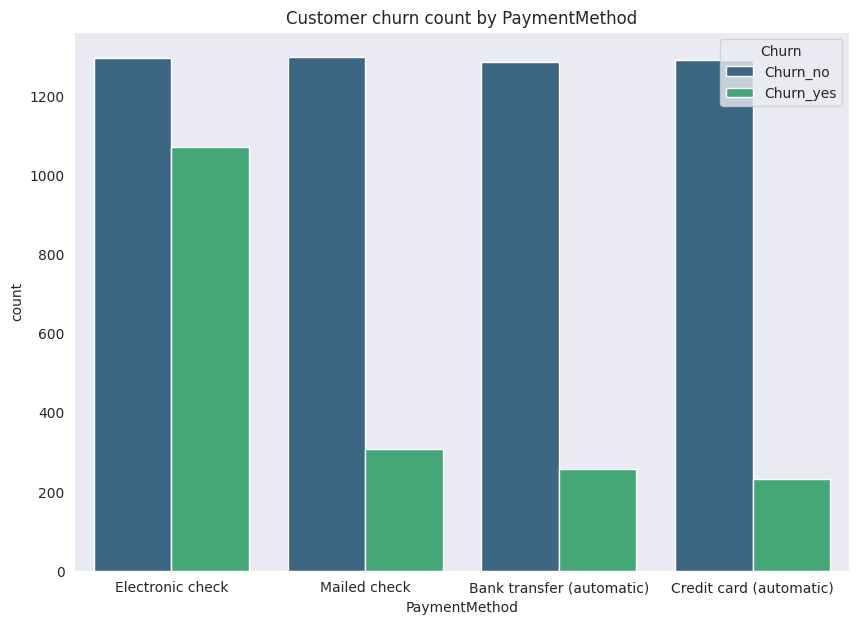

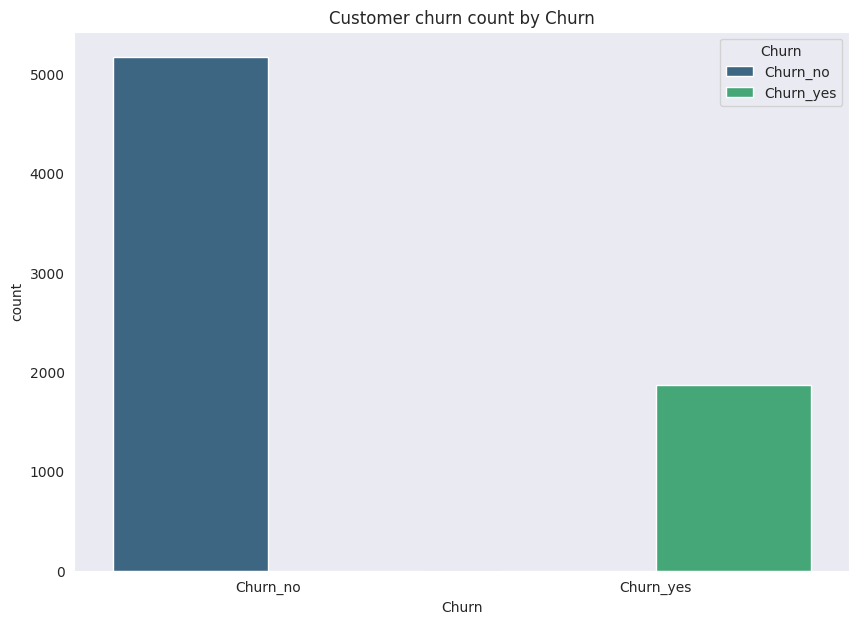

In [16]:
for feat in categorical:
  plt.figure(figsize = (10, 7))
  sns.countplot(data = df, x = feat, hue = 'Churn', palette = 'viridis')
  plt.title(f'Customer churn count by {feat}')
  plt.show()
  print('')

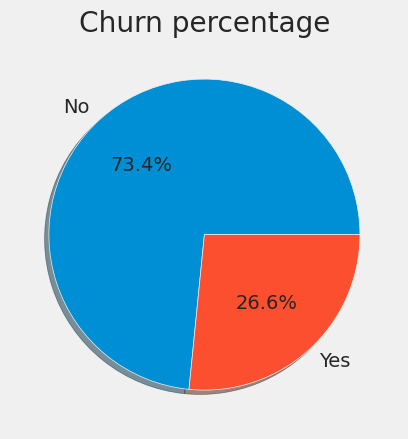

In [17]:
plt.style.use("fivethirtyeight")
plt.pie(df['Churn'].value_counts(), labels = ['No', 'Yes'], autopct='%1.1f%%', shadow = True)
plt.title('Churn percentage')
plt.show()

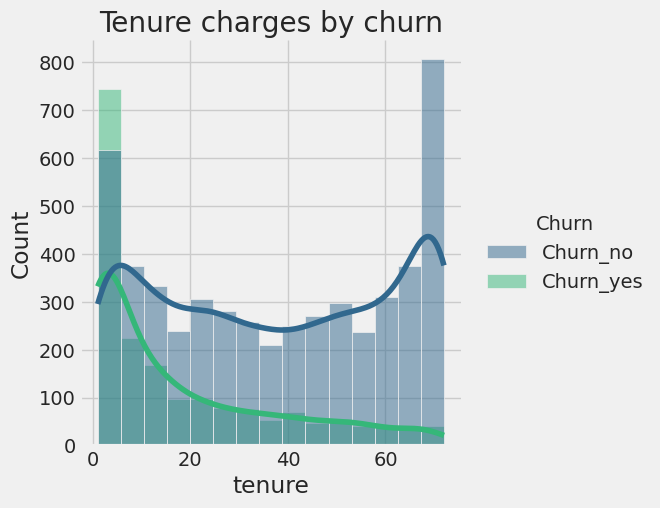

In [18]:
sns.displot(data=df, x="tenure", hue="Churn", kde=True, palette = 'viridis')
plt.title('Tenure charges by churn')
plt.show()

## Conclusions:

### Significant data
- A high rate of customer churns are related to **Eletronic check** as payment method.
- High tenure time, lower churn rate.
- Churns are concetrated between an interval of 0 and 30 months. 
- Customers that have internet service with **Fiber optic** are more likely to churn.
- Customer without dependants churn more.
- Customers with a **month-to-month** contract type are more likely to churn.
- Customers with a higher monthly charge are more likely to churn.
- Customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts.
- **Non-senior citizens** churn more than **non-senior** in absolute term but in relative term **senior citizens** churn more often.

### Low significance data
- **Gender** has no influence on whether the customer will churn or not.
- **StreamingMovies, StreamingTV and MultipleLines** has very little influence in churns.

## About data distribution
- The average tenure of the customers is around 32 months, with a standard deviation of 24 months.
- The average monthly charge is 64.76, with a standard deviation of 30.09.
- Churn rate is around 27.0%.
- We have a non-symmetric bimodal distribution for customers that keep the internet plan as time passes and a right skewed distribution for customers that cancels the plan.
---

## Encoding

In [19]:
mms = MinMaxScaler() # normalization


df['Churn'] = np.where(df['Churn'] == 'Churn_yes', 1, 0)

# splitting categorical columns from numeric for encoding
encoded = pd.get_dummies(df[categorical])
numeric = df[quant] # only numeric values

# normalizing numeric data
for num in quant:
  numeric[num] = mms.fit_transform(numeric[num].values.reshape(-1, 1))

# merging the encoded values with numerics again
all_data = pd.concat([encoded, numeric], axis = 1)

## Applying SMOTENN

In [20]:
churn_counts = df['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]
print(f'Rate between customers and churners is {churn_ratio}')

Rate between customers and churners is 2.7624398073836276


In [21]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

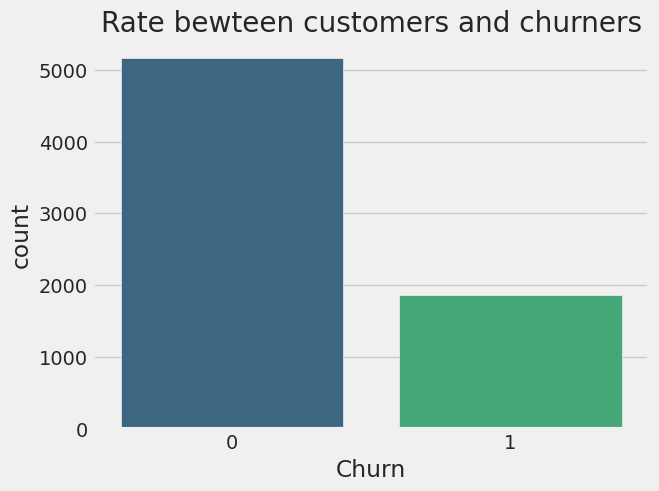

In [43]:
sns.countplot(data = df, x = df['Churn'], palette = 'viridis')
plt.title('Rate bewteen customers and churners')
plt.show()

- Minor class is ~2.76 times smaller than the major class, we should consider oversampling the minor class (Churn yes).
- This problem is called Imbalance dataset. I'll be using **SMOTE-ENN technique** for trying to get better results.
- **SMOTE** means Synthetic Minority Over-sampling Technique and **ENN** means Edited Nearest Neighbors. 
- These techniques add synthetical examples for the minority class (churn yes) and remove noisy examples from the majority class (churn no).
- SMOTE will be used to over-sample the minor class by generating synthetical data examples.
- The **ENN** will be used to remove noisy examples from the majority class.
- This will result in a balanced dataset with reduced noise and increased number of minority class examples.

In [23]:
# samples
x = all_data.drop('Churn', axis = 1)

# target
y = all_data['Churn']

sm = SMOTEENN()

# oversampling
x_resampled, y_resampled = sm.fit_resample(x, y)

In [24]:
# checking churners rate again
oversampled = pd.concat([y_resampled, x_resampled], axis = 1)

churn_counts = oversampled['Churn'].value_counts()
churn_ratio = churn_counts[0]/churn_counts[1]
print(f'rate between customers and churners is now: {churn_ratio}')

rate between customers and churners is now: 0.781615925058548


In [25]:
oversampled['Churn'].value_counts()

1    3416
0    2670
Name: Churn, dtype: int64

## Comparing Distributions

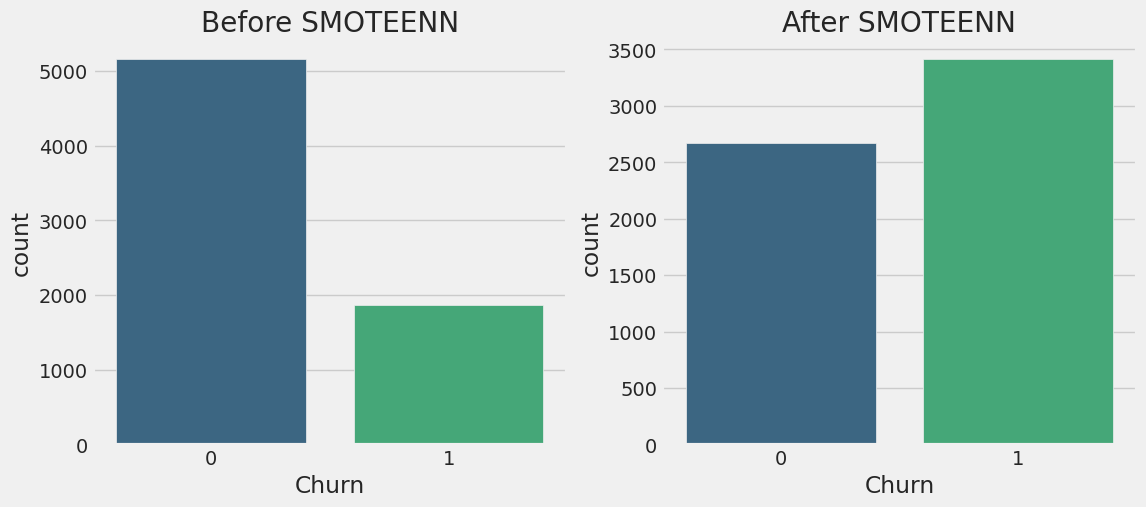

In [26]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.countplot(data = df, x = 'Churn', palette = 'viridis')
plt.title("Before SMOTEENN")


plt.subplot(1, 2, 2) # index 2
sns.countplot(data = oversampled, x = 'Churn', palette = 'viridis')
plt.title("After SMOTEENN")

plt.show()

In [27]:
# splitting oversampled data

x = oversampled.drop('Churn', axis = 1)
y = oversampled['Churn']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

# Model Selection

## Decision Tree

In [28]:
# cross Validation
def get_best_model(estimator, params_grid = {}):
  model = GridSearchCV(estimator = estimator, param_grid = params_grid, cv = 3, scoring = 'accuracy', n_jobs = - 1)
  model.fit(x_train, y_train)
  print('\n--- Best Parameters-----------------------------')
  print(model.best_params_)
  print('\n--- Best Model---------------------------------')
  best_model = model.best_estimator_
  print(best_model)
  return best_model

In [29]:
# model fit function
def model_fit(model, feature_imp = True, cv = 5):

  clf = model.fit(x_train, y_train)

  # prediction
  y_pred = model.predict(x_test)

  print('\n--- Train Set -----------------------------')
  print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
  print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc'))))
  print('\n--- Validation Set -----------------------------')    
  print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
  print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc'))))
  print('-----------------------------------------------') 

  # reports
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes = class_names, title = 'Confusion Matrix')
  print(' ')

  # feature importance   
  if feature_imp:
      feat_imp = pd.Series(clf.feature_importances_,index=x_train.columns)
      feat_imp = feat_imp.nlargest(15).sort_values()
      plt.figure()
      plt.title("Most Important Features")
      feat_imp.plot(kind="barh")
      plt.show()




In [30]:
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
class_names = ['Success','Failure']


### Random Forest


--- Best Parameters-----------------------------
{'max_depth': 10, 'max_features': 13, 'min_samples_split': 11, 'n_estimators': 20}

--- Best Model---------------------------------
RandomForestClassifier(max_depth=10, max_features=13, min_samples_split=11,
                       n_estimators=20, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.94700 +/- 0.0070
AUC: 0.98781 +/- 0.0018

--- Validation Set -----------------------------
Accuracy: 0.93434 +/- 0.0157
AUC: 0.98128 +/- 0.0070
-----------------------------------------------


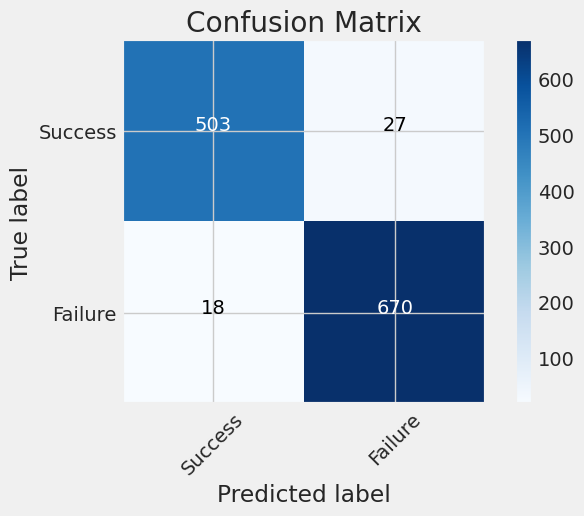

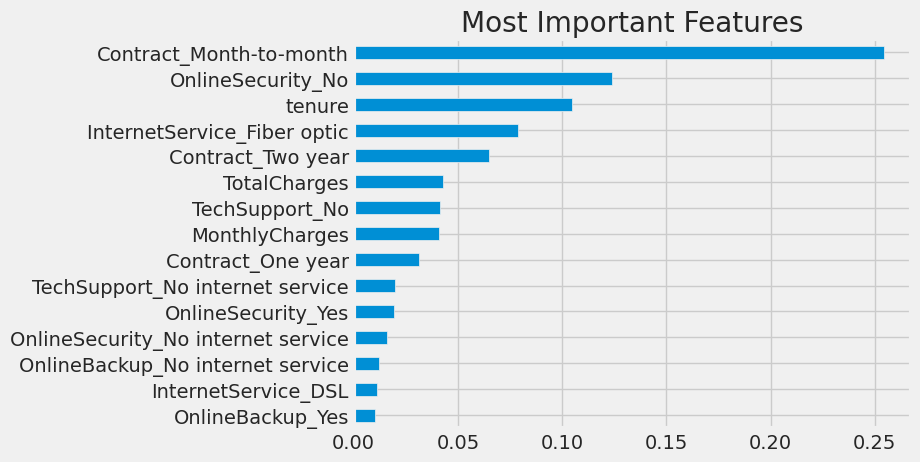

In [31]:
classifier_rf = RandomForestClassifier(random_state = 3)
parameters = {
              'n_estimators': [10, 15, 20],
              'max_depth':[10],
              'max_features': [13,14],
              'min_samples_split':[11]}

clf_rf = get_best_model(classifier_rf, parameters)
model_fit(model = clf_rf, feature_imp = True)

### K-Nearest Neighbors KNN


--- Best Parameters-----------------------------
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

--- Best Model---------------------------------
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

--- Train Set -----------------------------
Accuracy: 0.96898 +/- 0.0044
AUC: 0.99031 +/- 0.0031

--- Validation Set -----------------------------
Accuracy: 0.93926 +/- 0.0149
AUC: 0.97824 +/- 0.0101
-----------------------------------------------


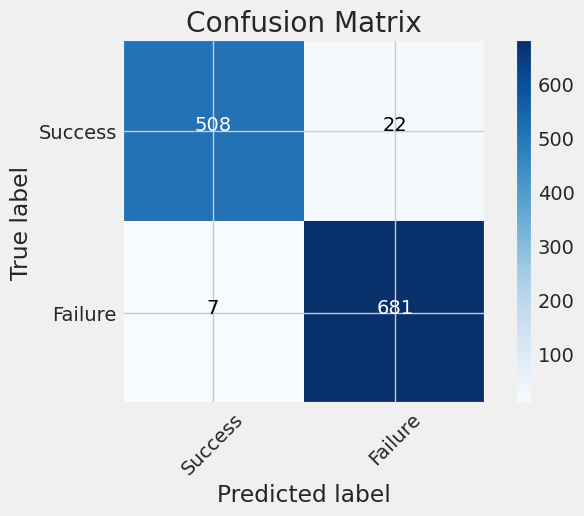

In [32]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5,6,7],
              #'p':[1,2],
              'weights': ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan']
}

clf_knn = get_best_model(knn, parameters)
model_fit(model = clf_knn, feature_imp = False)

### Naive Bayes


--- Train Set -----------------------------
Accuracy: 0.89934 +/- 0.0027
AUC: 0.95969 +/- 0.0028

--- Validation Set -----------------------------
Accuracy: 0.90642 +/- 0.0124
AUC: 0.96957 +/- 0.0023
-----------------------------------------------


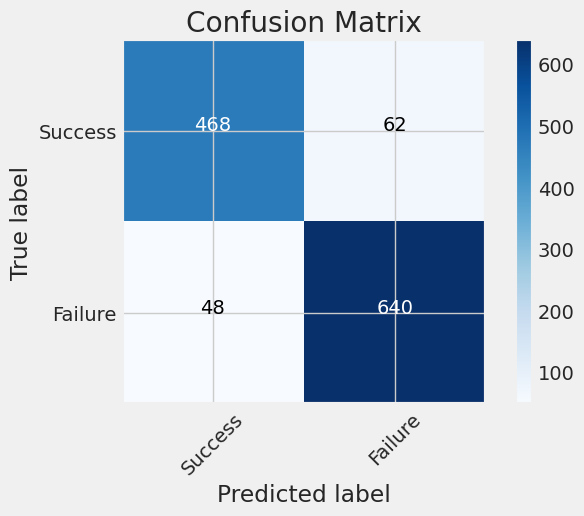

In [33]:
clf_nb = GaussianNB()
model_fit(model = clf_nb, feature_imp = False)

### Logistic Regression


--- Best Parameters-----------------------------
{'C': 1, 'penalty': 'l2'}

--- Best Model---------------------------------
LogisticRegression(C=1, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.94104 +/- 0.0063
AUC: 0.98818 +/- 0.0019

--- Validation Set -----------------------------
Accuracy: 0.94417 +/- 0.0041
AUC: 0.98643 +/- 0.0048
-----------------------------------------------


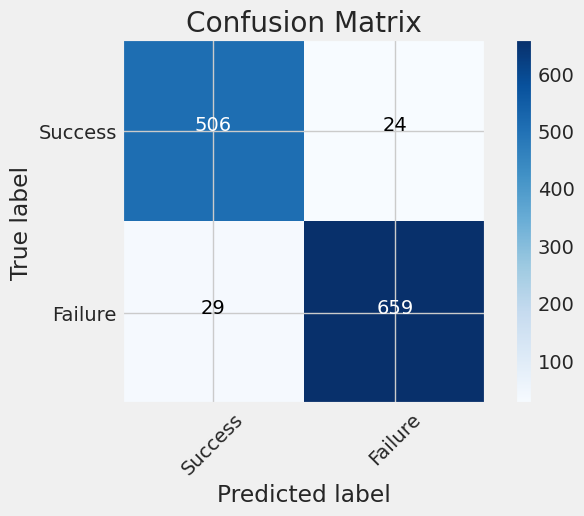

In [34]:
lg = LogisticRegression(random_state=3)
parameters = {'C':[0.8,0.9,1], 
              'penalty':['l1','l2']}
clf_lg = get_best_model(lg,parameters)
model_fit(model=clf_lg, feature_imp=False)

### Model Evaluation

In [35]:
# Compare model performance(KFold)
clfs= [clf_knn, clf_nb, clf_lg, clf_rf]
index =['Random Forests', 'KNN', 'Naive Bayes', 'Logistic Regression']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)
models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

Naive Bayes            0.944175
Random Forests         0.939260
Logistic Regression    0.934339
KNN                    0.906419
dtype: float64

# Model Selection
 - Very few diferences form accuracy between the models. I'm gonna be chosing the KNN model since it made few errors according to the confusion matrix chart and have high accuracy.

## Model Saving

In [36]:
filename = 'model.sav'

pickle.dump(clf_knn, open(filename, 'wb'))

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
input_data = (x_test.values[0])

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1, -1)

prediction = clf_knn.predict(input_data_reshaped)

print(prediction)

if prediction[0] == 0:
  print('This customer have low chance of churning')
else:
  print('This customer have a high chance o churning.')


[1]
This customer have a high chance o churning.
